In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
vase1 = pd.read_csv('/content/vase1.CSV')


In [42]:
vase1.head()


,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.33,0.40,0.36,0.23,0.02,False
1,2020,3,6,22,17,11,0.32,0.39,0.35,0.23,0.02,False
2,2020,3,6,22,18,11,0.31,0.39,0.34,0.22,0.02,False
3,2020,3,6,22,19,11,0.30,0.38,0.33,0.21,0.02,False
4,2020,3,6,22,20,11,0.29,0.38,0.33,0.21,0.02,False


In [43]:
vase1.shape

(4409, 12)

<Axes: >

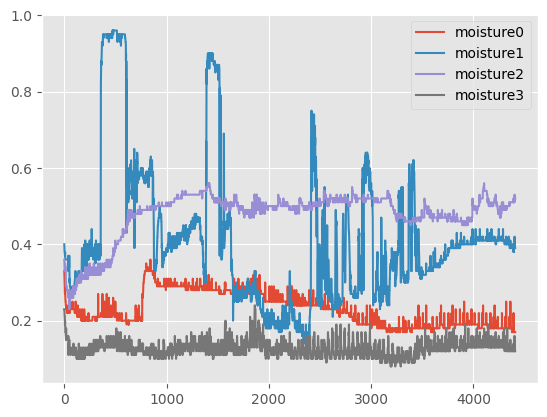

In [44]:
vase1[['moisture0', 'moisture1','moisture2', 'moisture3']].plot()


In [45]:
X = vase1.iloc[:,6:10].values
y = vase1.iloc[:,-2].values

In [46]:
vase2= pd.read_csv('/content/vase2.CSV')

In [47]:
vase2.shape

(10289, 12)

In [48]:
vase2.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,11,14,44,39,0.59,0.63,0.51,0.45,0.01,False
1,2020,3,11,14,47,9,0.56,0.60,0.52,0.48,0.01,False
2,2020,3,11,14,49,39,0.56,0.54,0.54,0.51,0.01,False
3,2020,3,11,14,52,9,0.56,0.50,0.57,0.51,0.01,False
4,2020,3,11,14,54,39,0.57,0.53,0.58,0.51,0.01,False


<Axes: >

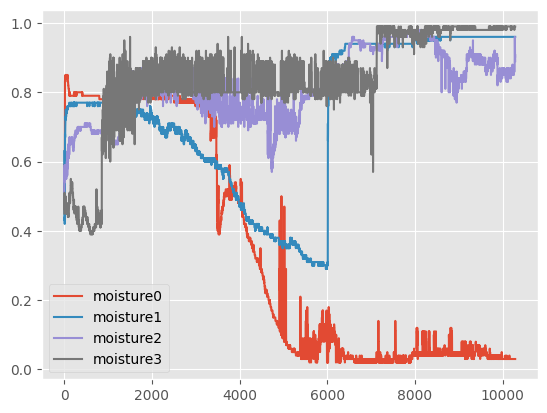

In [49]:
vase2[['moisture0', 'moisture1','moisture2', 'moisture3']].plot()

In [50]:
X2 = vase2.iloc[0:882,6:10].values
y2 = vase2.iloc[0:882,-2].values

In [51]:
print ("1. Random Forest Regression ")

1. Random Forest Regression 


In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 0)

In [53]:
regressor1 = RandomForestRegressor(n_estimators=100, random_state=0)

In [54]:
regressor1.fit(X_train, y_train)
pred_y = regressor1.predict(X_test)

In [55]:
for i in range (10):
    print("Actual : " , y_test[i],"\t", "Predicted : ", pred_y[i])

Actual :  0.02 	 Predicted :  0.020278730158730166
Actual :  0.04 	 Predicted :  0.04009999999999998
Actual :  0.02 	 Predicted :  0.026499999999999996
Actual :  0.03 	 Predicted :  0.030012131630015638
Actual :  0.02 	 Predicted :  0.024459761904761904
Actual :  0.03 	 Predicted :  0.029999999999999947
Actual :  0.03 	 Predicted :  0.029999999999999947
Actual :  0.02 	 Predicted :  0.015866666666666675
Actual :  0.02 	 Predicted :  0.021153846153846162
Actual :  0.03 	 Predicted :  0.030171098760052386


In [56]:
from sklearn import metrics
print('Mean Absolute Error : ', mean_absolute_error(pred_y, y2))

Mean Absolute Error :  0.021004783293431945


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Training Accuracy : ',regressor1.score(X_train, y_train))

Training Accuracy :  0.9543140243865802


In [58]:
print ("2. Linear Regression ")

2. Linear Regression 


In [81]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor_fin = regressor2.fit(X_train, y_train)

In [82]:
model3 = regressor_fin

In [60]:
pred_Y = regressor2.predict(X_test)
y2 = vase2.iloc[0:882,-2].values
for i in range (10):
    print("Actual : " , y_test[i],"\t", "Predicted : ", pred_Y[i])

Actual :  0.02 	 Predicted :  0.01828258980294799
Actual :  0.04 	 Predicted :  0.0386853032644749
Actual :  0.02 	 Predicted :  0.022212977226018546
Actual :  0.03 	 Predicted :  0.029160749197457085
Actual :  0.02 	 Predicted :  0.026303807554211446
Actual :  0.03 	 Predicted :  0.025950025273463136
Actual :  0.03 	 Predicted :  0.027798052638923154
Actual :  0.02 	 Predicted :  0.0187829961560525
Actual :  0.02 	 Predicted :  0.025047541289853016
Actual :  0.03 	 Predicted :  0.0277404817091432


In [61]:
print('Mean Absolute Error : ', mean_absolute_error( y2, pred_Y))


Mean Absolute Error :  0.021158904998239726


In [62]:
X2 = vase2.iloc[0:2058,6:10].values
print('Training Accuracy : ',regressor2.score(X_train, y_train))

Training Accuracy :  0.36945123716579775


In [63]:
print(" 3. Lasso Regression " )

 3. Lasso Regression 


In [64]:
regression3 = Lasso(alpha=0.5)
regression3.fit(X_train, y_train)
y2=vase2.iloc[0:882,-2].values

In [65]:
predict_Y = regression3.predict(X_test)


In [66]:
cv_score = cross_val_score(regression3, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(cv_score)}")
rmse = mean_squared_error(y2, predict_Y, squared=False)
print(f"RMSE --> {rmse}")

CV Score --> -0.003331682312758133
RMSE --> 0.021530780900378937


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
print('Mean Absolute Error : ', mean_absolute_error(predict_Y, y2))


Mean Absolute Error :  0.020942772534777075


In [68]:
X2=vase2.iloc[0:2058,6:10].values
print('Training Accuracy : ',regression3.score(X_train, y_train))

Training Accuracy :  0.0


In [69]:
print(" 4. Xgboost Regression ")

 4. Xgboost Regression 


In [70]:
import seaborn as sns
plt.style.use("ggplot")
import os
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
from sklearn.metrics import mean_absolute_error
predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.0018798884786580964


In [72]:
my_model = (n_estimators=500)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
print('Training Accuracy : ',my_model.score(X_train, y_train))

Training Accuracy :  0.9287939639751446


In [74]:
# Save the model to a file
my_model.save_model('xgboost_model.json')  # You can also use .txt format


In [88]:
import xgboost as xgb

# Train the XGBoost regressor model
my_model = xgb.XGBRegressor()
my_model.fit(X_train, y_train)

# Save the model to a file in XGBoost's binary format
my_model.save_model('xgb_model.json')  # You can also use .bin format


In [89]:
import h5py

# Save the XGBoost model as an H5 file
with h5py.File('xgb_model.h5', 'w') as f:
    # Read the XGBoost model binary data
    with open('xgb_model.json', 'r') as xgb_model_file:
        model_data = xgb_model_file.read()

    # Create an H5 dataset and store the model binary data as string
    f.create_dataset('xgb_model', data=model_data)


In [83]:
import pickle

# Specify the filename where you want to save the model
filename = 'my_model.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(model3, file)

print(f"Model saved to {filename}")

Model saved to my_model.pkl


In [85]:
import tensorflow as tf
from tensorflow import keras

# Define your model (example: a simple Sequential model)
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Save the model to an HDF5 file
model.save('soil.h5')

print("Model saved to 'soil.h5'")


ModuleNotFoundError: No module named 'tensor'